# 3. Systèmes discrets

## 3.1 Introduction

Un système de commande numérique prend la forme du schéma fonctionnel ci-dessous:

![Commande numérique](Images/digital_control.svg)

Le système fonctionne ainsi:
- le signal de sortie continu *PV* du *Système à commander* est converti par le *A-D* en signal numérique (point 1)
- ce signal numérique est comparé à une consigne *SP*, non représentée ici car souvent en mémoire, et est transformé en un autre signal numérique (point 2)
- le signal numérique au point 2 est converti en signal continu par le *D-A*
- le signal continu obtenu *MV* sert à commander le *Système à commander*

L'horloge permet d'imposer les instants d'échantillonnage et de calcul de manière périodique.

La figure peut être interprétée de 2 façons:
- l'algorithme reçoit une suite de nombres qu'il transforme en une autre suite de nombres
- la mise en série de *D-A*, *Système à commander* et *A-D* constitue une vision échantillonnée du *Système à commander*

Quelque soit l'interprétation, on se retrouve avec des éléments échantillonnés dans le système. La transformée de Laplace devient donc inutile. Il faut développer de nouveaux outils.

## 3.2 Systèmes discrets au repos, linéaires, causals et stationnaires

Cette section rappelle des définitions déjà connues. Elle ne sera donc pas détaillée.

#### Définitions
- un système est discret si ses signaux d'entrée et de sortie sont discrets

- un système discret est au repos au temps 0 si sa sortie $\{y(kh) : k \geq 0 \}$ est déterminée uniquement par son entrée $\{u(kh) : k \geq 0 \}$

- un système discret est linéaire si l'application $\mathscr{G}$ est linéaire, autrement dit si, quelles que soient les entrées $\{u(kh)\}$, $\{u_1(kh)\}$ et $\{u_2(kh)\}$, et pour tout nombre $a \in \mathbb{R}$:

$$ \mathscr{G}\left(\left\{u_1(kh)\right\} + \left\{u_2(kh)\right\}\right) = \mathscr{G}\left(\left\{u_1(kh)\right\}\right) + \mathscr{G}\left(\left\{u_2(kh)\right\}\right) $$
$$ \mathscr{G}\left(a\left\{u(kh)\right\}\right) = a\mathscr{G}\left(\left\{u(kh)\right\}\right)$$

- un système discret est causal si sa sortie $y(k_0h)$ au temps $k_0h$ ne dépend pas des valeurs prises par l'entréée après $k_0h$, c'est-à-dire ne dépend pas de $\left\{u(kh) : k > k_0\right\}$

- l'impulsion unité est le signal discret $\left\{\Delta(kh)\right\}$ défini par:

$$ \Delta(kh) = \left\{
  \begin{array}{rl}
    1 \qquad si k = 0 \\
    0 \qquad si k \neq 0
  \end{array} \right. $$
  
- la réponse $\mathscr{G}\left\{\Delta(kh-lh)\right\} = \left\{g(kh, lh)\right\}$ d'un système discret à une impulsion unité injectée à l'instant $lh \geq 0$ est appelée réponse impulsionnelle

- un système discret est stationnaire ou invariant si un décalage temporel de l'impulsion unité appliquée à son entrée provoque le même décalage temporel de la sortie:

$$ g(kh, lh) = g(kh+dh, lh+dh) \qquad k+d \geq 0 \quad l+d \geq 0 $$

#### Produit de convolution
Soit un système discret au repos, linéaire, causal et stationnaire. Alors sa sortie s'exprime comme un produit de convolution entre l'entrée qui lui est appliquée et sa réponse impulsionnelle:


$$ y(kh) = \sum_{l=0}^{k}u(lh)g(kh-lh) $$

Voici une version programmée de cet algorithme:

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('../my_params.mplstyle')

In [66]:
def discrete_conv(u, g):
    k_max = len(g) + len(u) - 1
    y = [0 for i in range(k_max)]
    
    for k in range(k_max):
        for l in range(k+1):
            y[k] += (u[l] if l < len(u) else 0) * (g[k-l] if k-l < len(g) else 0)
    
    return y

In [67]:
u = [1, 3, -2]
g = [1.5, -1, 0.5]

y = discrete_conv(u, g)

time = [i for i in range(len(y))]

In [68]:
print('u = {}'.format(u))
print('g = {}'.format(g))
print('y = {}'.format(y))

u = [1, 3, -2]
g = [1.5, -1, 0.5]
y = [1.5, 3.5, -5.5, 3.5, -1.0]


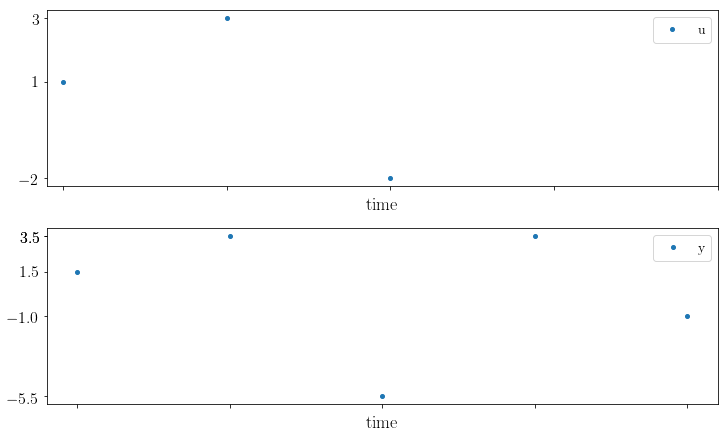

In [69]:
fig, axs = plt.subplots(2, 1, constrained_layout=True)
axs[0].plot(time[:len(u)], u, '.', label='u')
axs[1].plot(time, y, '.', label='y')
axs[0].set_yticks(u)
axs[1].set_yticks(y)

for i in range(len(axs)):
    axs[i].set_xlabel('time')
    axs[i].set_xticks(time)
    axs[i].set_xticklabels([])
    axs[i].legend()

L'idée est de considérer $\left\{u(kh)\right\}$ comme une suite d'impulsions. Comme le système est linéaire, la sortie $\left\{y(kh)\right\}$ vaudra la somme des sorties du système aux différentes impulsions constituant l'entrée.

#### Exemple

In [71]:
u1 = [1, 0, 0]
u2 = [0, 3, 0]
u3 = [0, 0, -2]

y1 = discrete_conv(u1, g)
y2 = discrete_conv(u2, g)
y3 = discrete_conv(u3, g)

yt = [y_1 + y_2 + y_3 for y_1, y_2, y_3 in zip(y1, y2, y3)]
print(yt)

[1.5, 3.5, -5.5, 3.5, -1.0]


On retrouve la même sortie que précédemment.

## 3.3 Systèmes représentés par des équations aux différences

#### Définition

$$ y(k+n) + a_1 y(k+n-1) + \dots + a_n y(k) = b_0 u(k+m) + b_1 u(k+m-1) + \dots + b_m u(k) $$

avec $a_i, b_j \in \mathbb{R}$, $u(k)$ l'entrée et $y(k)$ la sortie.

En retardant les signaux de $n$ périodes d'échantillonnage, et en posant $d=n-m$, on obtient, après développement:

$$ y(k) + a_1 y(k-1) + \dots + a_n y(k-n) = b_0 u(k-d) + b_1 u(k-d-1) + \dots + b_m u(k-d-m) $$



La plupart des systèmes discrets en commande numérique sont régis par des équations aux différences.

#### Exemple
Prenons comme exemple un régulateur PI numérique. Sa sortie $u(k)$ à l'instant kh est donnée par:

$$ u(k) = K_p \left( e(k) + \frac{1}{T_i} \sum_{l=0}^{k-1}e(l)h \right) $$

En effet, à un instant $kh$ donné, la commande vaut la somme de l'action proportionnelle et de l'action intégrale. La première est proportionnelle à l'erreur instantanée, et la seconde est proportionnelle à la somme des erreurs depuis le lancement de la commande ($k=0$) jusqu'à l'erreur à l'instant précédent. L'intégrale numérique génère donc un retard d'une période d'échantillonnage.

Ecrivons cette même équation, mais à l'instant $k-1$:

$$ u(k-1) = K_p \left( e(k-1) + \frac{1}{T_i} \sum_{l=0}^{k-2}e(l)h \right) $$

En soustrayant les 2 formulations, on obtient:

$$ u(k) - u(k-1) = K_p \left( e(k) - e(k-1) + \frac{h}{T_i}e(k-1) \right) $$

L'équation est donc d'ordre 1 suivante:

$$ u(k) - u(k-1) = K_p e(k) + K_p \left(\frac{h}{T_i} - 1\right)e(k-1) $$

Lorsque $d=n-m \ge 0$, une entrée quelconque $u(k)$ ne prendra effet que $d$ périodes d'échantillonnages plus tard. Le système est donc bien causal et $d$ est appelé surplus de pôles ou degré relatif.

#### Remarque
Un retard pur échantillonné est donné par l'équation aux différences suivante:

$$ y(k) = u(k-d) $$

avec $d$ un retard de $d$ périodes d'échantillonnages.

Il est à remarquer qu'un retard pur discret est facile à prendre en compte, contrairement à un retard pur continu. En effet, le retard pur discret peut être décrit par une équation aux différences alors qu'un retard pur analogique ne peut pas être décrit par une équation différentielle.

Il faut tout de même ajouter qu'un retard pur discret ne peut qu'être multiple de la période d'échantillonnage $h$. Si le retard pur analogique correspondant n'est pas multiple de la période d'échantillonnage, une erreur sur le retard sera commise lors de la numérisation.

## 3.4 Opérateurs avance et retard

#### Définitions
- L'opérateur avance $q$ est l'application qui, au signal discret $\left\{w(kh)\right\}$, fait correspondre le signal discret $q\left\{w(kh)\right\} = \left\{w(kh+h)\right\}$
- L'opérateur retard $q$ est l'application qui, au signal discret $\left\{w(kh)\right\}$, fait correspondre le signal discret $q^{-1}\left\{w(kh)\right\} = \left\{w(kh-h)\right\}$

Les équations aux différences précédentes peuvent être réécrites ainsi:

$$ q^n y(k) + a_1 q^{n-1} y(k) + \dots + a_n y(k) = b_0 q^m u(k) + b_1 q^{m-1} u(k) + \dots + b_m u(k) $$

$$ y(k) + a_1 q^{-1} y(k) + \dots + a_n q^{-n} y(k) = b_0 q^{-d} u(k) + b_1 q^{-d-1} u(k) + \dots + b_m q^{-d-m} u(k) $$

Ou:

$$ \left(q^n + a_1 q^{n-1} + \dots + a_n \right)y(k) = \left(b_0 q^m + b_1 q^{m-1} + \dots + b_m \right)u(k) $$

$$ \left(1 + a_1 q^{-1} + \dots + a_n q^{-n} \right)y(k) = \left(b_0 q^{-d} + b_1 q^{-d-1} + \dots + b_m q^{-d-m} \right)u(k) $$